### Import Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Data Cleaning

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.columns = df.columns.str.replace(" ","_",regex=False)
# df.columns.str is a string accesor, this allows you to access the elements in a column and then apply operations to them

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Using the.info() method we can see that we have no missing data

In [5]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Visualizations

In [6]:
df_quality = pd.DataFrame(df['quality'].value_counts()).reset_index()
df_quality=df_quality.rename(columns={'index':'quality','quality':'count'})
df_quality

,quality,count
0,5,681
1,6,638
2,7,199
3,4,53
4,8,18
5,3,10


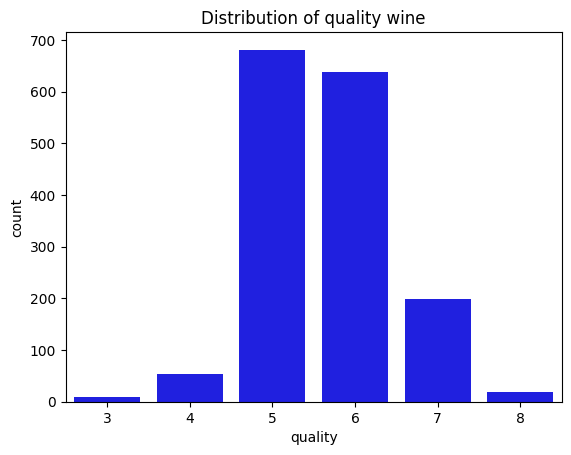

In [7]:
sns.barplot(data=df_quality,x='quality',y='count',color='blue')
plt.title('Distribution of quality wine')
plt.show()

The graph shows us that most of the wine are rated as as 5 or 6.

### Good vs Poor Wine

We need to classify what is a good wine versus a poor wine. The simpliest way to do this is to set criteria using the "quality" feature.
We can classify good wines with anything with a "quality" rating of 7 and above. We essentially created a binary output for our model. We can set "1" as good wine and "0" as a poor wine.

In [8]:
df['recommend'] = [1 if x >= 7 else 0 for x in df['quality']]

In [9]:
df.drop(columns='quality',inplace=True)

In [10]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,recommend
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


### Decision Tree

Split the data into features and target variable

In [11]:
features_col = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Make sure to remove the "quality" column or else the model will be overfitted since using the "quality" column will not properly train the model.
# We are essentially creating a binary rating system for the wine. Using the "quality" feature will be cheating.

In [12]:
X = df[features_col]
y = df['recommend']

In [13]:
print('feature vectors -->')
print(f'rows, cols: {X.shape}')
print(f'num of rows: {X.shape[0]}')
print('')
print('label vector -->')
print(f'rows,: {y.shape}')
print(f'num of rows: {y.shape[0]}')

feature vectors -->
rows, cols: (1599, 11)
num of rows: 1599

label vector -->
rows,: (1599,)
num of rows: 1599


### Splitting the Data

We will assign 20% of the data as test data and the remaining 80% will serve as our train data. We will use the random_state parameter to select the data randomly when testting. Seeding this value will ensure reproducability. Seeding in this context means that if you use the same seeding number on the parameter, the function will produce the same random numbers each time you ran the code/program. 

In [14]:
# assign test data 20% of the the sample
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=56)

Decision trees are not sensitive to variances in the data therefore we do no need to scale or normalize the features.

### Build the model

In [15]:
# create an instance of the dt classifier
decision_tree_classifier = DecisionTreeClassifier()

# train the dt classifier using our training data
decision_tree_classifier.fit(X=X_train,y=y_train)

DecisionTreeClassifier()

### Make predictions based on the trained model

In [16]:
predicted_labels = decision_tree_classifier.predict(X=X_test)

### Evaluate the accuracy of the model

In [17]:
# Compare the testing labels with the predicted labels
dcl_accuracy = metrics.accuracy_score(y_true = y_test, y_pred=predicted_labels, normalize=True)

print(f"Accuracy:{dcl_accuracy} ")

Accuracy:0.865625 


### Visualize decision trees

[Text(0.3837164256198347, 0.9642857142857143, 'alcohol <= 10.775\ngini = 0.236\nsamples = 1279\nvalue = [1104, 175]'),
 Text(0.12422520661157024, 0.8928571428571429, 'sulphates <= 0.645\ngini = 0.089\nsamples = 834\nvalue = [795, 39]'),
 Text(0.04132231404958678, 0.8214285714285714, 'free_sulfur_dioxide <= 13.5\ngini = 0.025\nsamples = 547\nvalue = [540, 7]'),
 Text(0.03305785123966942, 0.75, 'free_sulfur_dioxide <= 11.5\ngini = 0.052\nsamples = 261\nvalue = [254, 7]'),
 Text(0.01652892561983471, 0.6785714285714286, 'free_sulfur_dioxide <= 8.5\ngini = 0.019\nsamples = 204\nvalue = [202, 2]'),
 Text(0.008264462809917356, 0.6071428571428571, 'gini = 0.0\nsamples = 139\nvalue = [139, 0]'),
 Text(0.024793388429752067, 0.6071428571428571, 'total_sulfur_dioxide <= 18.5\ngini = 0.06\nsamples = 65\nvalue = [63, 2]'),
 Text(0.01652892561983471, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03305785123966942, 0.5357142857142857, 'fixed_acidity <= 9.7\ngini = 0.031\nsamp

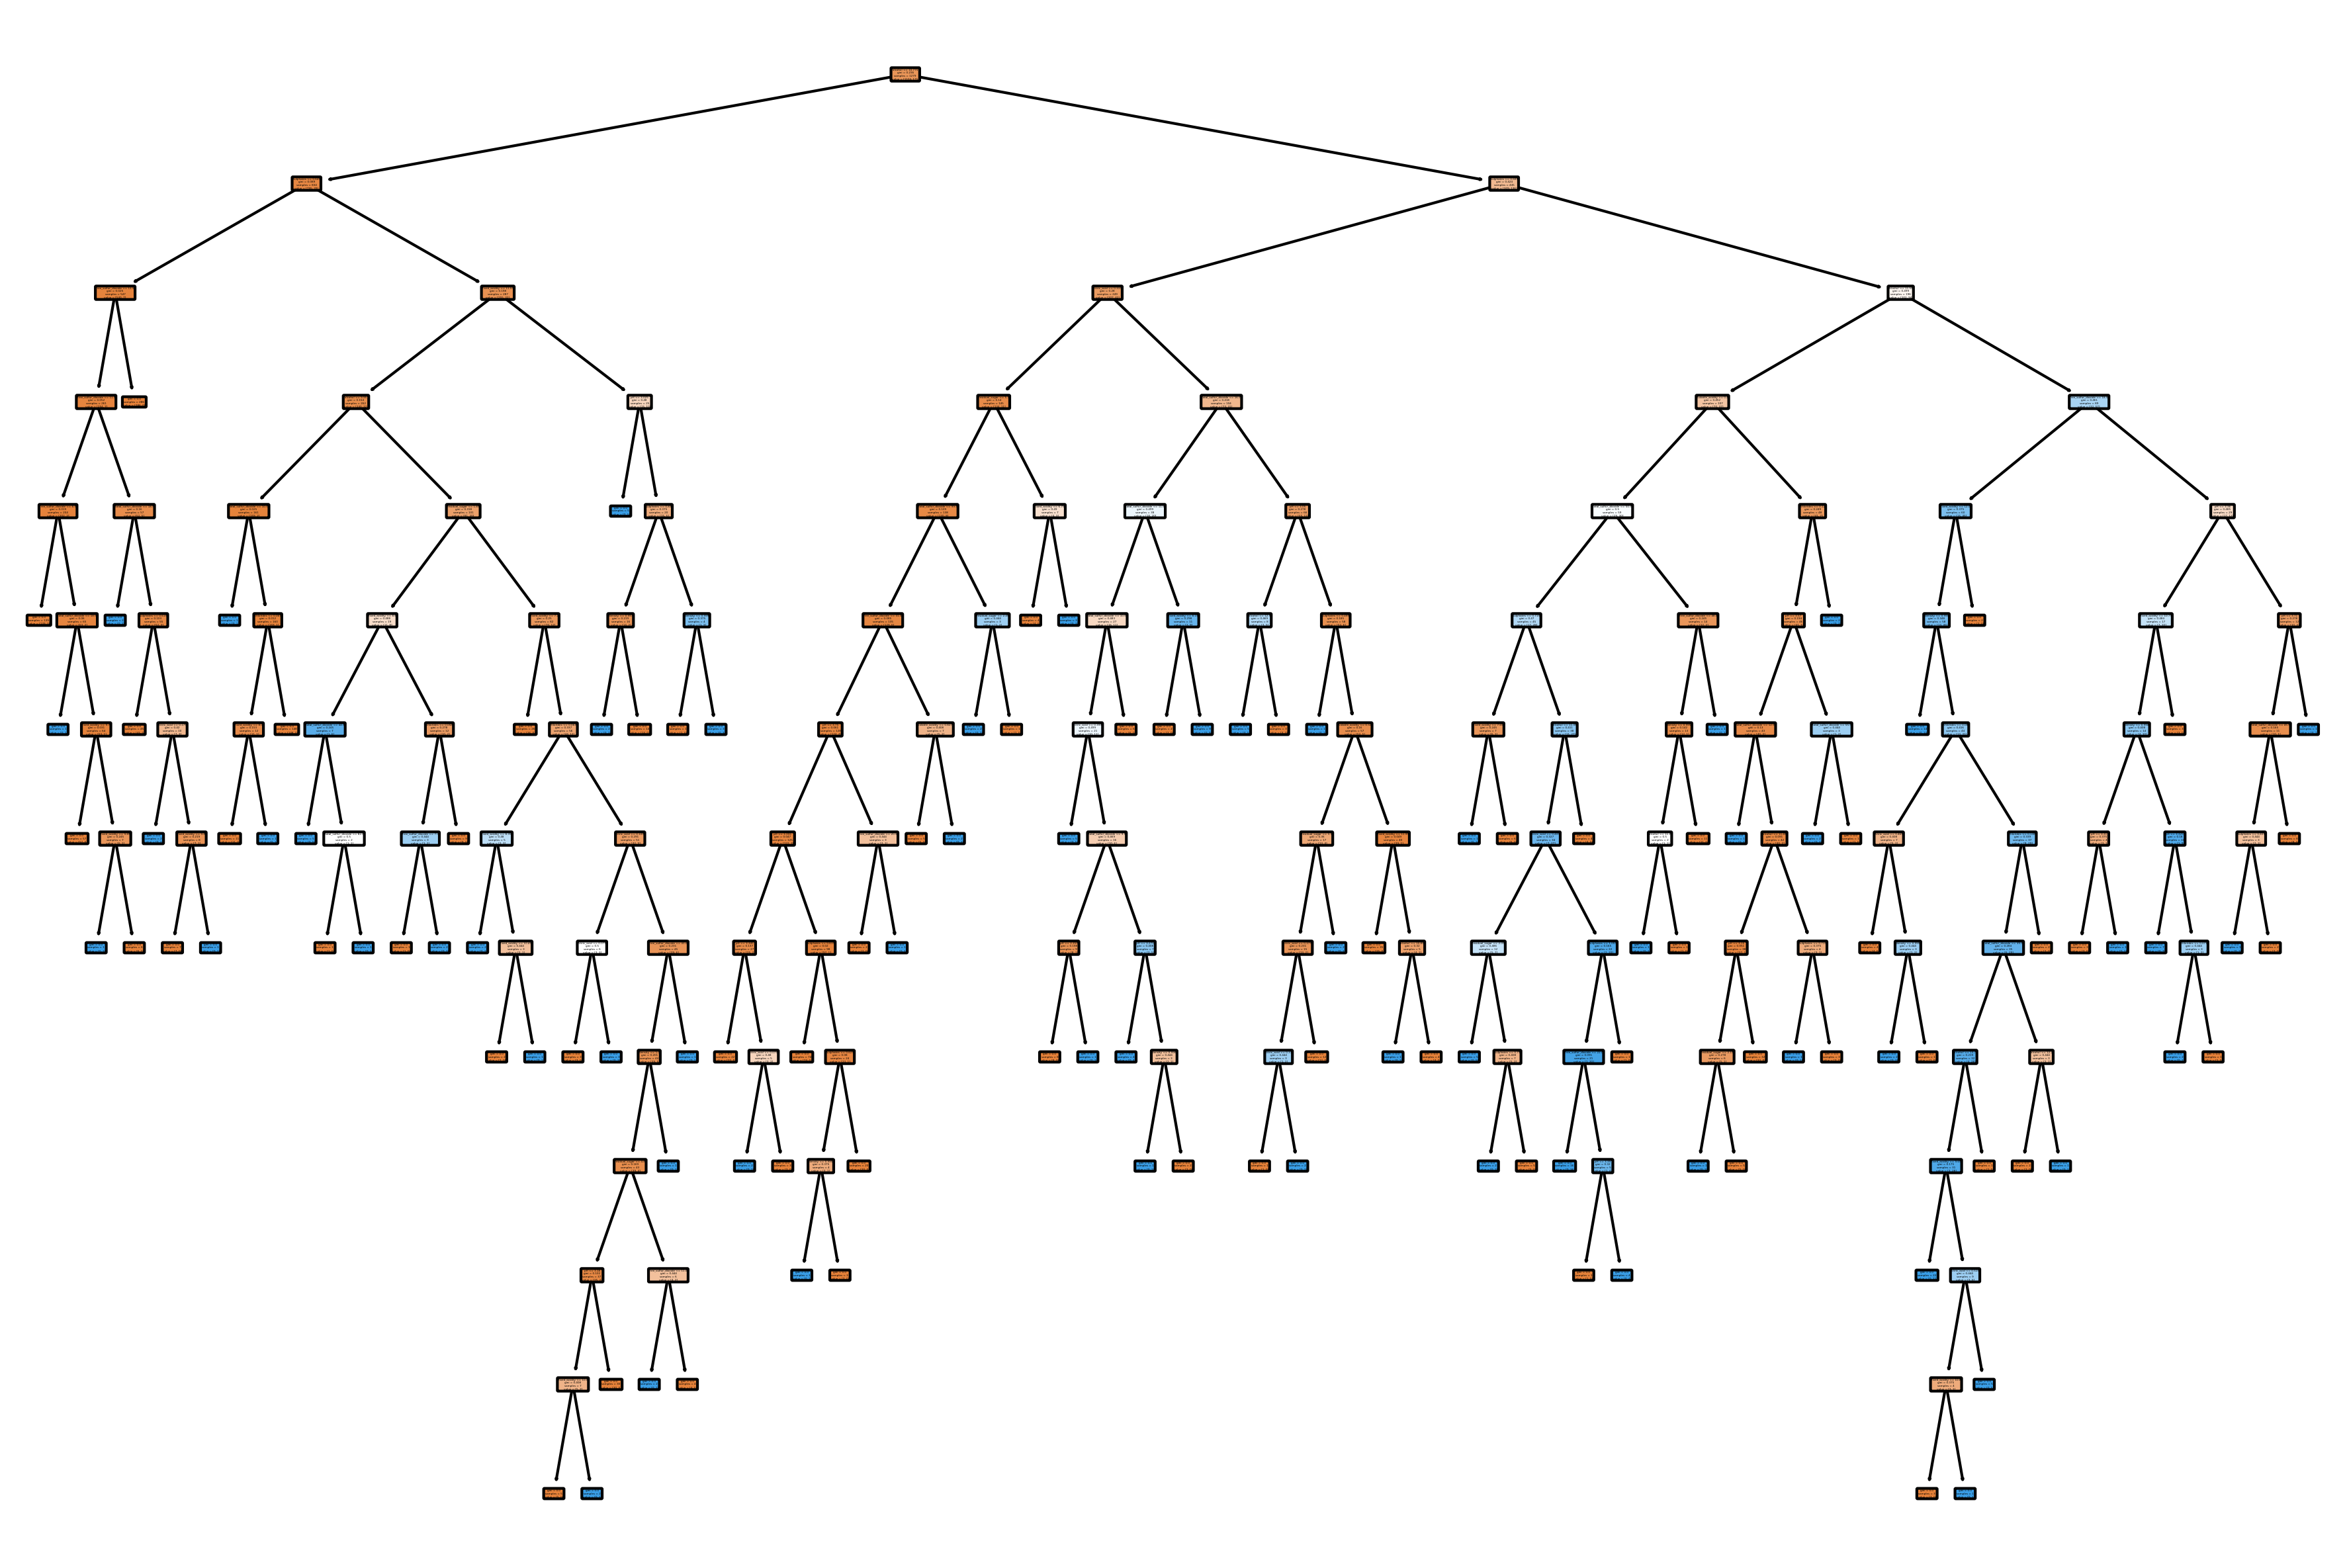

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10),dpi=300)
plot_tree(decision_tree_classifier,feature_names=features_col, filled=True, rounded=True)

In [19]:
# depth of the model
decision_tree_classifier.get_depth()
print(f'The depth of the tree is {decision_tree_classifier.get_depth()}.')

The depth of the tree is 13.


We created a complex tree with more than 10 levels. We will tweak the model to see if we can gain or retrain accuracy while reducing the complexity.

In [30]:
# create an instance of the dt classifier
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy",max_depth=3)

# train the dt classifier using our training data
decision_tree_classifier.fit(X=X_train,y=y_train)

# Create predictions using the model
predicted_labels = decision_tree_classifier.predict(X=X_test)

# Compare the testing labels with the predicted labels
dcl_accuracy = metrics.accuracy_score(y_true = y_test, y_pred=predicted_labels, normalize=True)

print(f"Accuracy:{dcl_accuracy} ")



Accuracy:0.9 


[Text(0.5, 0.875, 'alcohol <= 10.45\nentropy = 0.576\nsamples = 1279\nvalue = [1104, 175]'),
 Text(0.25, 0.625, 'sulphates <= 0.615\nentropy = 0.201\nsamples = 733\nvalue = [710, 23]'),
 Text(0.125, 0.375, 'sulphates <= 0.565\nentropy = 0.044\nsamples = 413\nvalue = [411, 2]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 277\nvalue = [277, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.111\nsamples = 136\nvalue = [134, 2]'),
 Text(0.375, 0.375, 'fixed_acidity <= 11.55\nentropy = 0.349\nsamples = 320\nvalue = [299, 21]'),
 Text(0.3125, 0.125, 'entropy = 0.261\nsamples = 295\nvalue = [282, 13]'),
 Text(0.4375, 0.125, 'entropy = 0.904\nsamples = 25\nvalue = [17, 8]'),
 Text(0.75, 0.625, 'sulphates <= 0.675\nentropy = 0.853\nsamples = 546\nvalue = [394, 152]'),
 Text(0.625, 0.375, 'pH <= 3.285\nentropy = 0.598\nsamples = 289\nvalue = [247, 42]'),
 Text(0.5625, 0.125, 'entropy = 0.865\nsamples = 94\nvalue = [67, 27]'),
 Text(0.6875, 0.125, 'entropy = 0.391\nsamples = 195\nvalue = [180, 15]'),
 

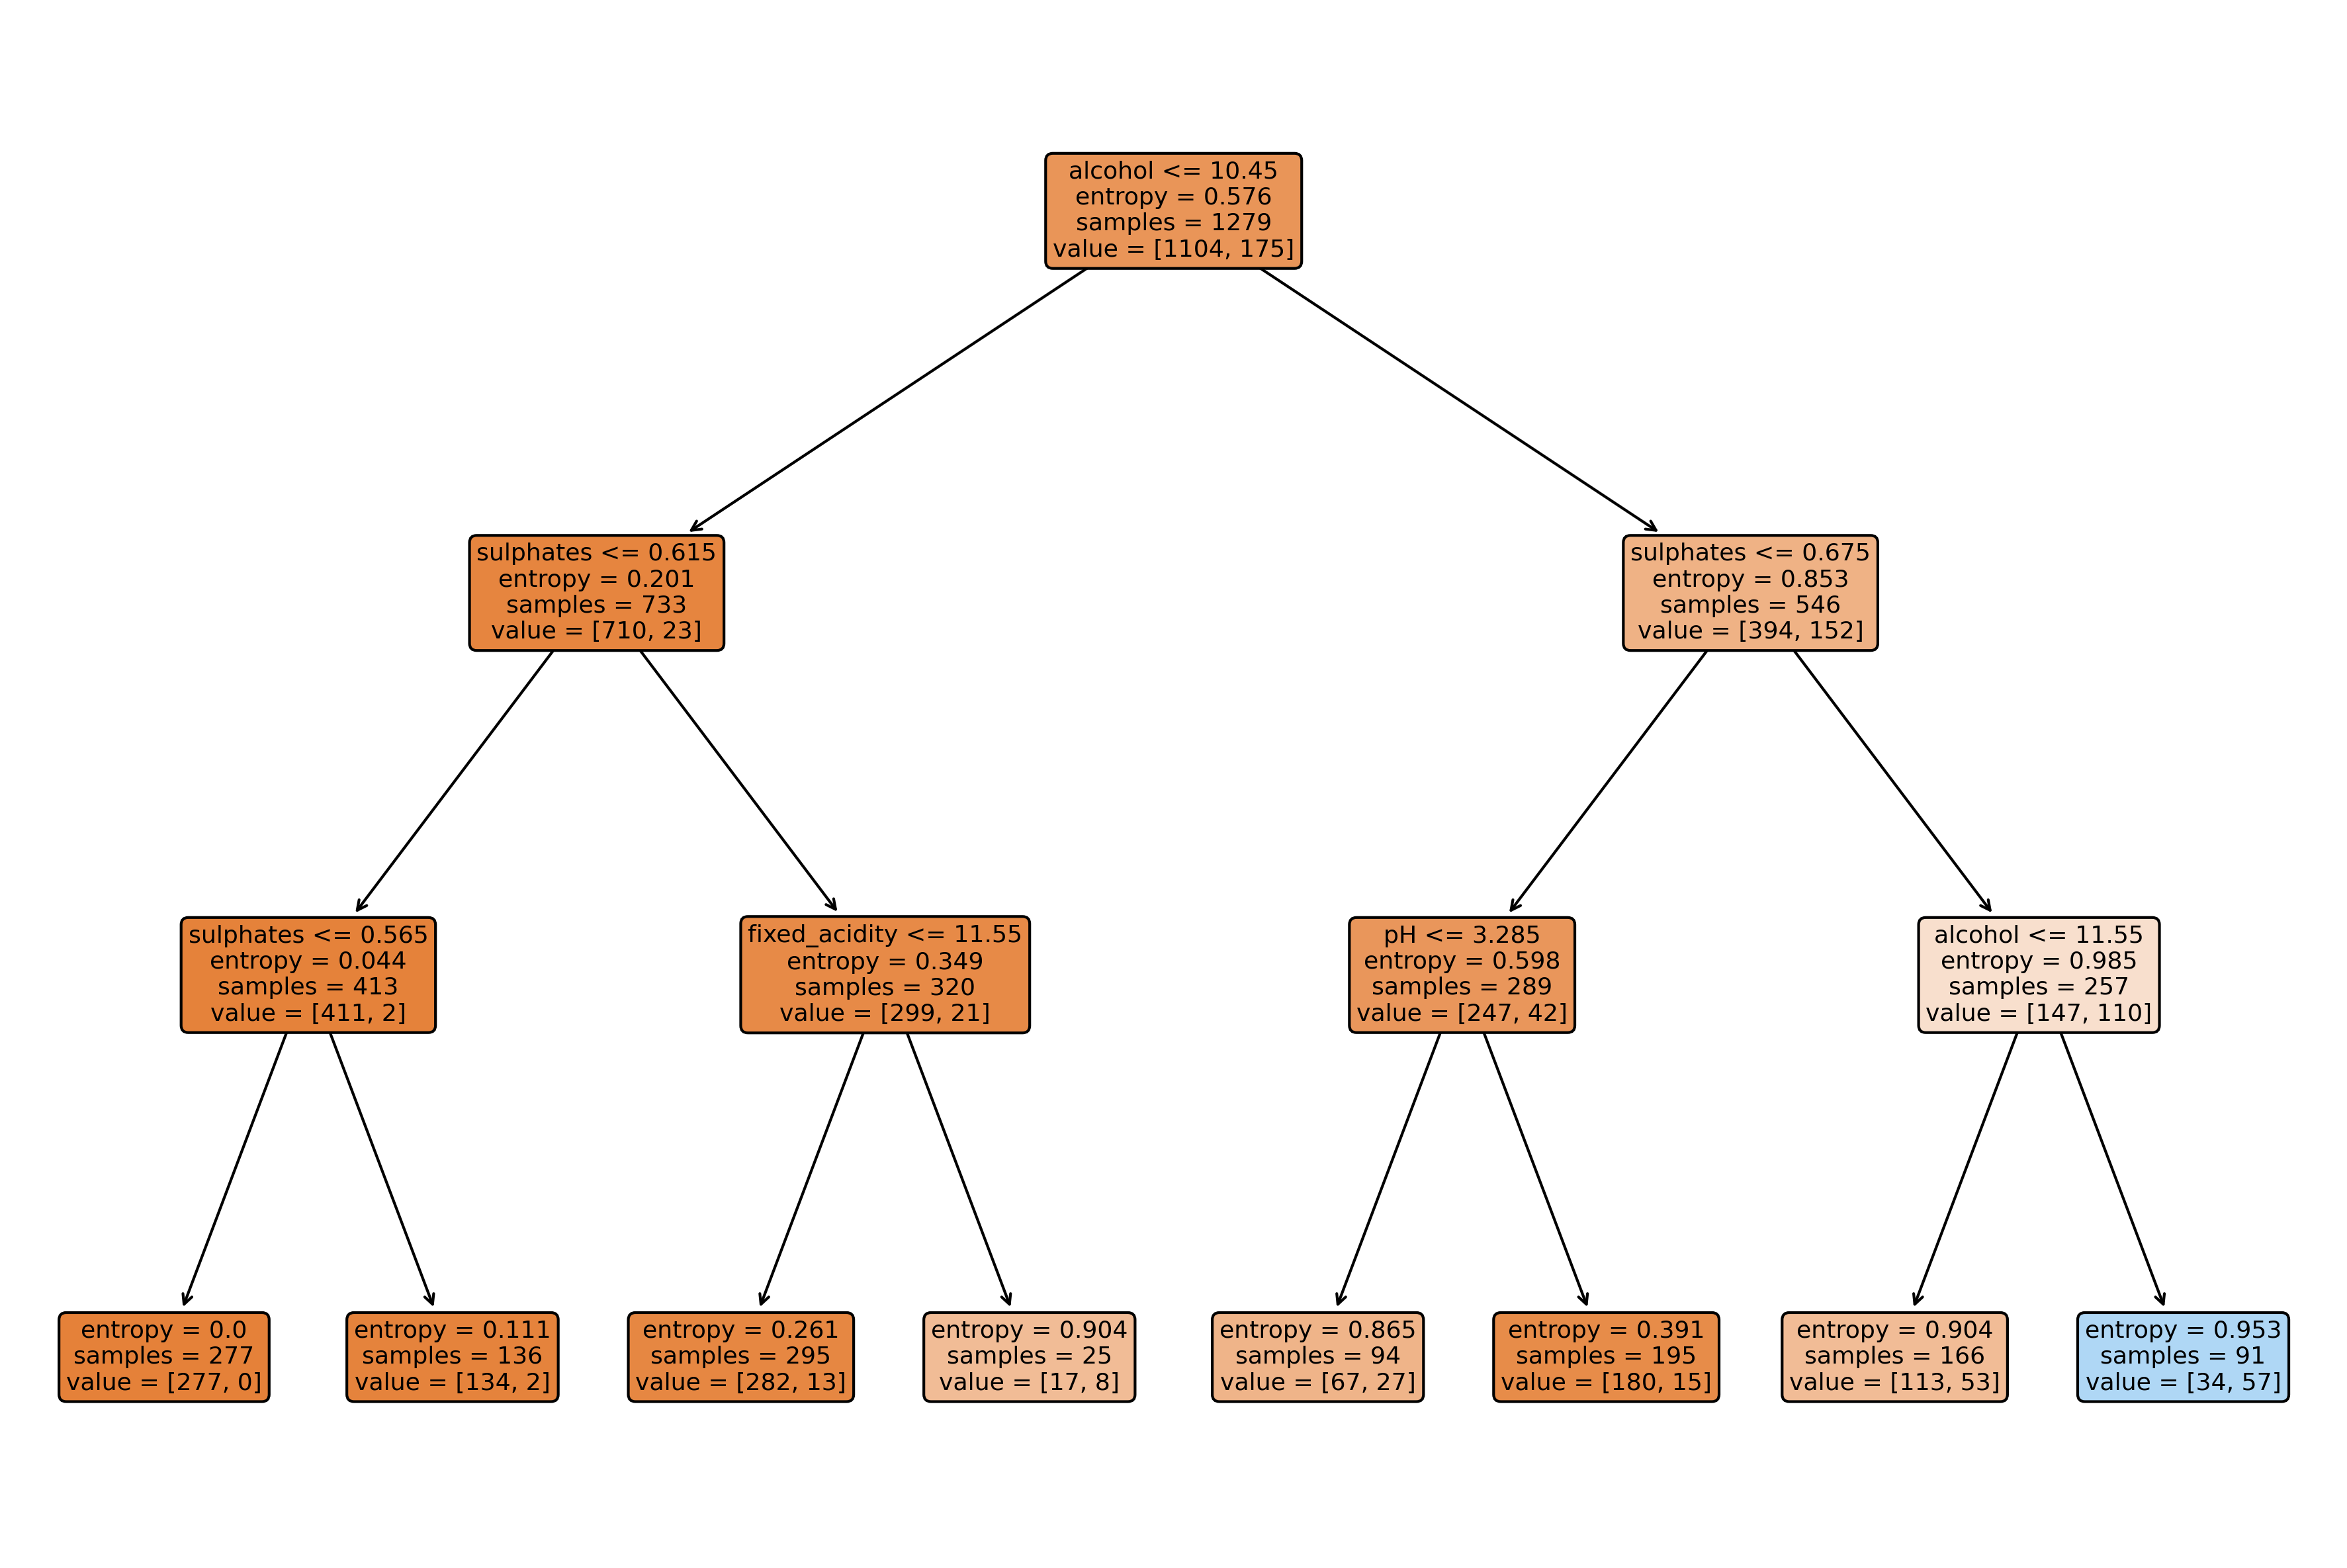

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10),dpi=300)
plot_tree(decision_tree_classifier,feature_names=features_col, filled=True, rounded=True)

### Confusion Matrix

In [28]:
metrics.confusion_matrix(y_true=y_test, y_pred=predicted_labels)

array([[270,   8],
       [ 24,  18]], dtype=int64)

In [23]:
TP = metrics.confusion_matrix(y_test, predicted_labels)[0,0]
TN = metrics.confusion_matrix(y_test, predicted_labels)[1,1]
FN = metrics.confusion_matrix(y_test, predicted_labels)[0,1]
FP = metrics.confusion_matrix(y_test, predicted_labels)[1,0]
total_pred = TP+TN+FP+FN 
print(f"TP = {TP}\nFP = {FP}\nTN = {TN}\nFN = {FN}")

TP = 270
FP = 24
TN = 18
FN = 8


In [29]:
cnf_matrix = metrics.confusion_matrix(y_test, predicted_labels)
fig = ff.create_annotated_heatmap(cnf_matrix[::-1],x=['Positive', 'Negative'],y=['Negative','Postive'])
fig.update_layout(xaxis_title='Predicted Value',yaxis_title = 'Expected Value')
fig.show()

In [31]:
print(f"The decision tree has an accuracy score of {dcl_accuracy}")

The decision tree has an accuracy score of 0.9
